## Contnet <a id='Jump'></a>

### [DataPreprocess](#preprocess)

### Imports

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

import inspect

## pre process 
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Selection And Cross Validation 
from sklearn.model_selection import KFold, cross_val_score, train_test_split , GridSearchCV

#Modles
from sklearn.linear_model import Ridge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from scipy.special import boxcox1p
# scoring 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from jupyterthemes import jtplot
jtplot.style(theme='grade3' , context='talk', fscale=1.4, spines=False, gridlines='--' , ticks=True,figsize=(6, 4.5) )

In [131]:
os.chdir('data')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'data'

In [ ]:
#it's just private methods 
train  = pd.read_csv('train.csv' , index_col = "Id")
test  = pd.read_csv('test.csv' , index_col = "Id")


In [ ]:
os.listdir()

In [ ]:
print(data_description)

In [ ]:
pd.set_option('max_rows',50)
pd.set_option('max_columns',100)

In [ ]:
train.head(1)

In [ ]:
train.columns.size

In [ ]:
train.info()

In [ ]:
train.describe()

### Lests start woth numaric Vars 

In [ ]:
numarics = train.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

In [ ]:
numarics

In [ ]:
na = numarics.isna().sum().sort_values(ascending =False)
numaricNA = na[na>0].to_frame()
numaricNA

#### LotFrontage: Linear feet of street connected to property

In [ ]:
sns.distplot(numarics['LotFrontage']);

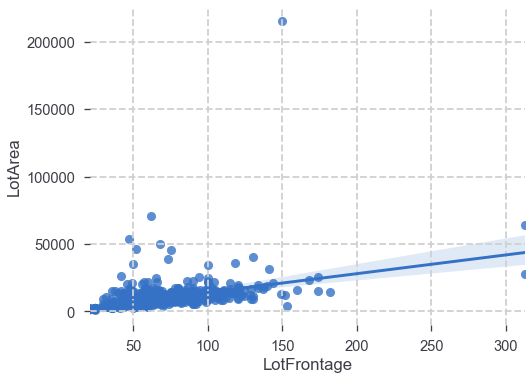

In [132]:
sns.regplot(data=numarics,x = 'LotFrontage' , y = 'LotArea');

In [133]:
train.describe().columns.size

37

#### GarageYrBlt: Year garage was built

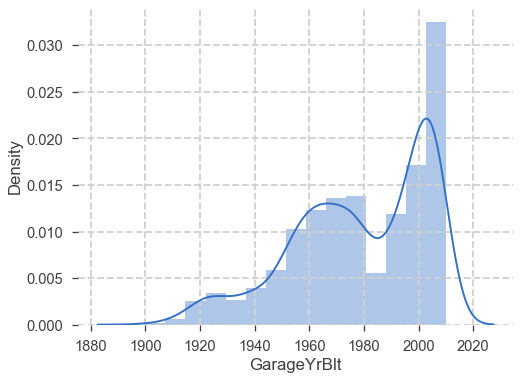

In [134]:
sns.distplot(numarics['GarageYrBlt']);
#YearBuilt ??

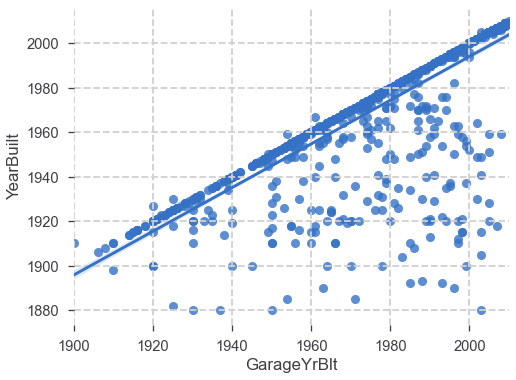

In [135]:
sns.regplot(data=numarics,x = 'GarageYrBlt' , y = 'YearBuilt');

In [136]:
print(train[['GarageYrBlt','GarageType','GarageArea']][train.GarageYrBlt.isnull()].shape)
train[['GarageYrBlt','GarageType','GarageArea']][train.GarageYrBlt.isnull()]

(81, 3)


,GarageYrBlt,GarageType,GarageArea
Id,,,
40,NaN,NaN,0
49,NaN,NaN,0
79,NaN,NaN,0
89,NaN,NaN,0
90,NaN,NaN,0
...,...,...,...
1350,NaN,NaN,0
1408,NaN,NaN,0
1450,NaN,NaN,0


In [137]:
train[['GarageYrBlt','GarageType','GarageArea']][train.GarageArea == 0].shape ==\
train[['GarageYrBlt','GarageType','GarageArea']][train.GarageYrBlt.isnull()].shape

True

##### Note
I have to put is Zero as the Building has no garage there 

also all years must not be numaric

##### Note
I have to put is Zero as the Building has no garage there 

also all years must not be numaric

#### MasVnrArea: Masonry veneer area in square feet


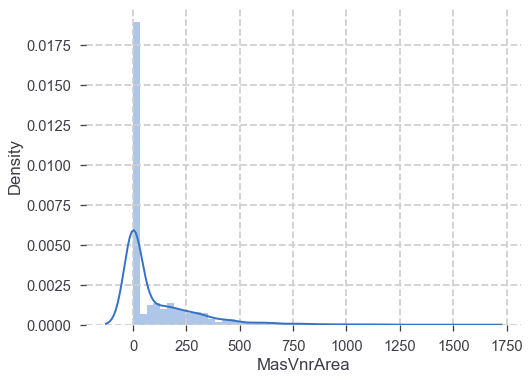

In [138]:
sns.distplot(numarics['MasVnrArea']);
#it's aroung 0 wiht cerinity

#### Explore All numaric vars distripution

HalfBath Distripution


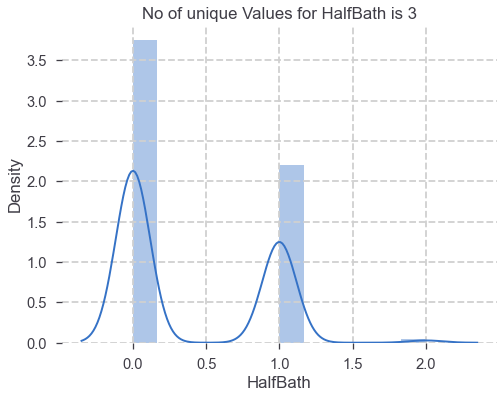

------------------------------------------------------
BsmtHalfBath Distripution


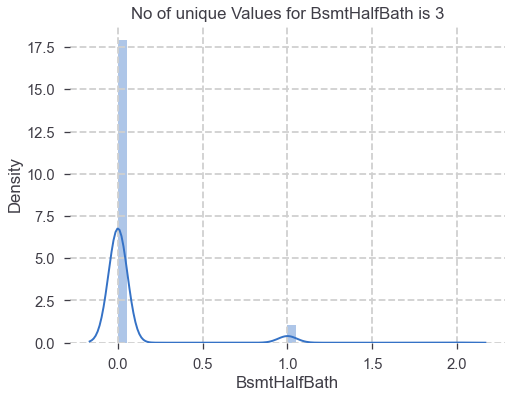

------------------------------------------------------
FullBath Distripution


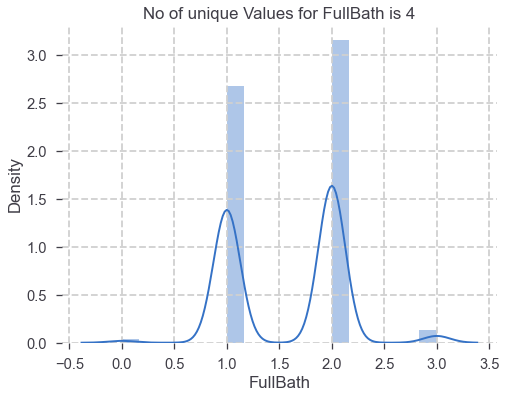

------------------------------------------------------
Fireplaces Distripution


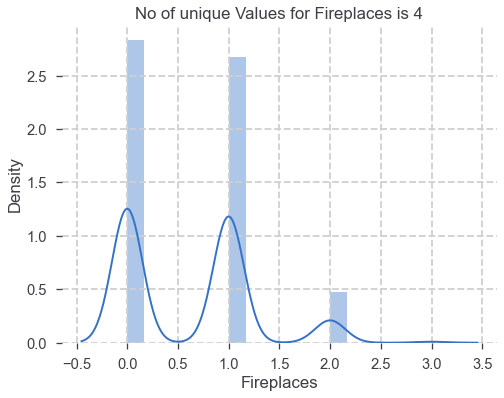

------------------------------------------------------
KitchenAbvGr Distripution


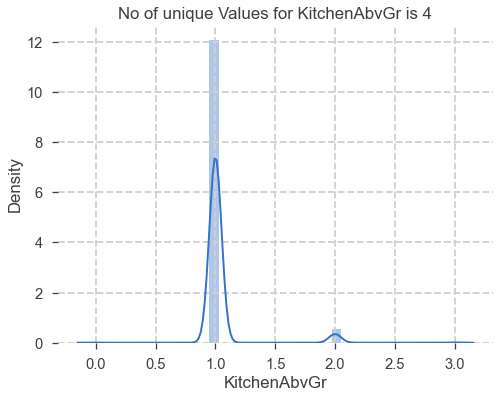

------------------------------------------------------
BsmtFullBath Distripution


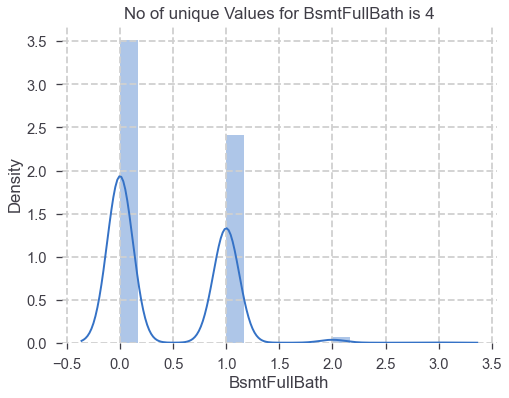

------------------------------------------------------
GarageCars Distripution


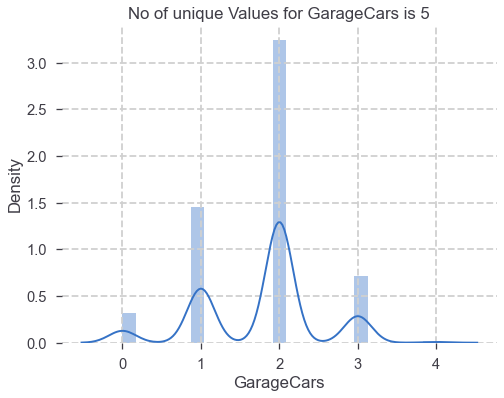

------------------------------------------------------
YrSold Distripution


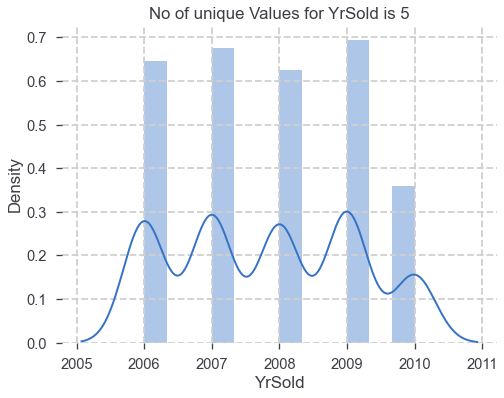

------------------------------------------------------
PoolArea Distripution


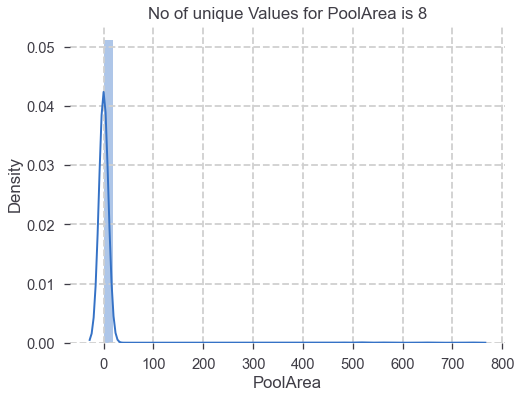

------------------------------------------------------
BedroomAbvGr Distripution


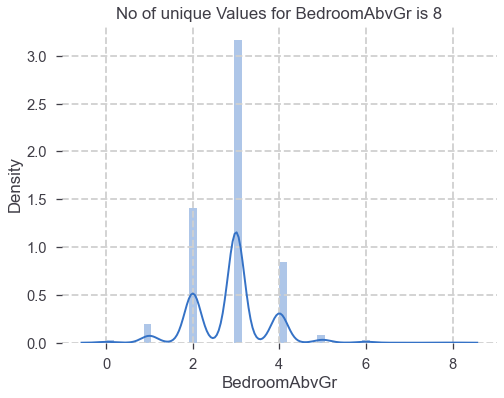

------------------------------------------------------
OverallCond Distripution


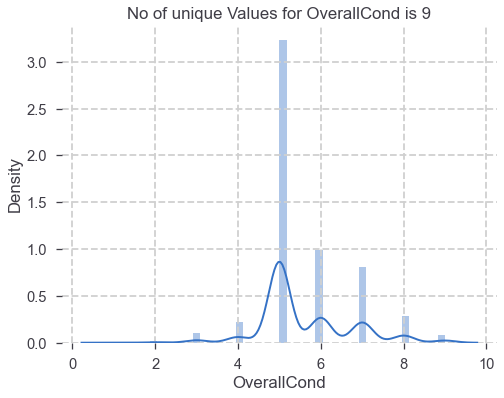

------------------------------------------------------
OverallQual Distripution


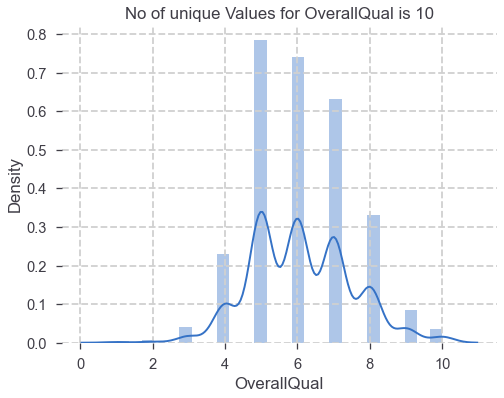

------------------------------------------------------
MoSold Distripution


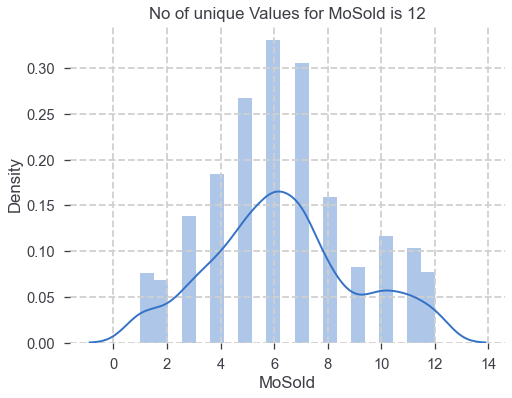

------------------------------------------------------
TotRmsAbvGrd Distripution


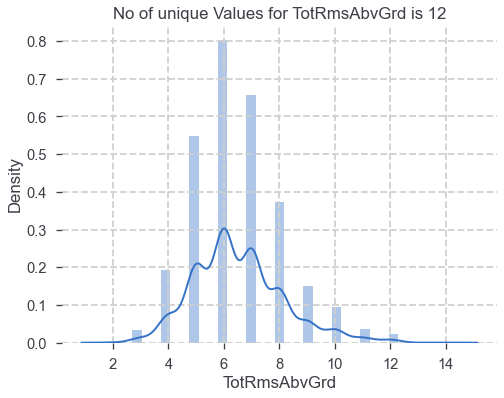

------------------------------------------------------
MSSubClass Distripution


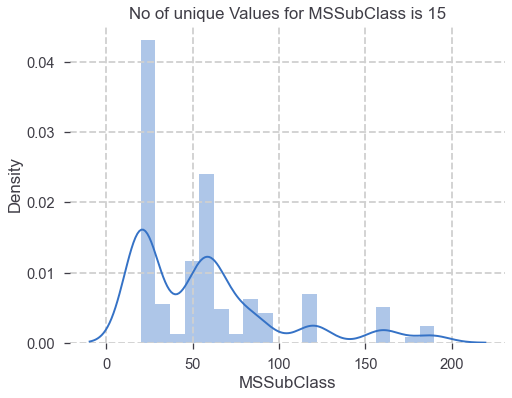

------------------------------------------------------
3SsnPorch Distripution


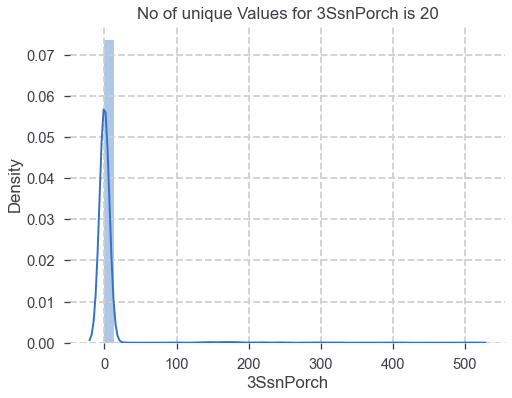

------------------------------------------------------
MiscVal Distripution


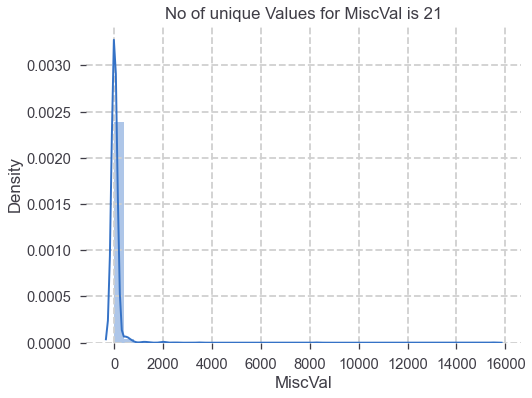

------------------------------------------------------
LowQualFinSF Distripution


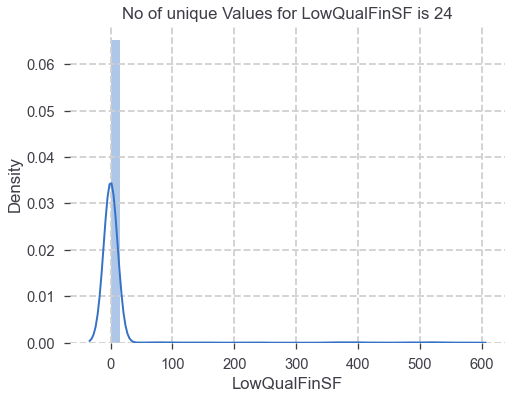

------------------------------------------------------
YearRemodAdd Distripution


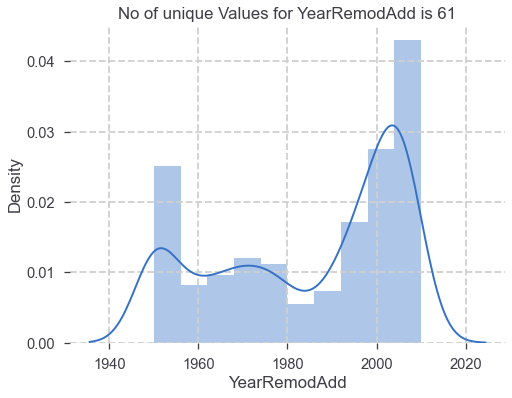

------------------------------------------------------
ScreenPorch Distripution


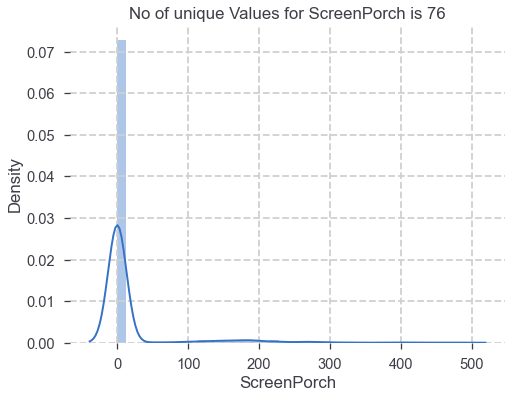

------------------------------------------------------
GarageYrBlt Distripution


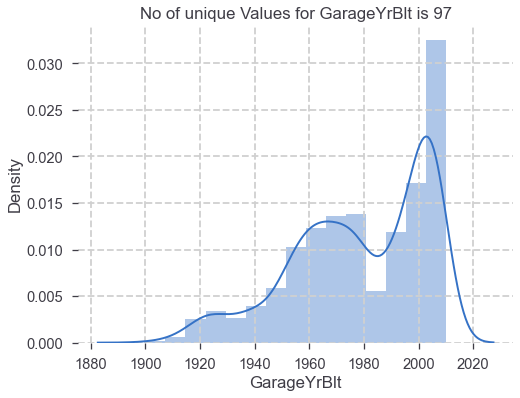

------------------------------------------------------
LotFrontage Distripution


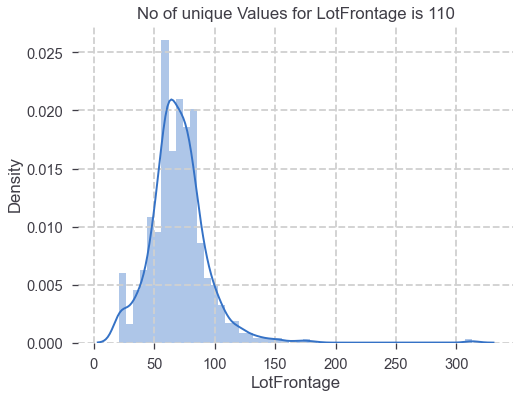

------------------------------------------------------
YearBuilt Distripution


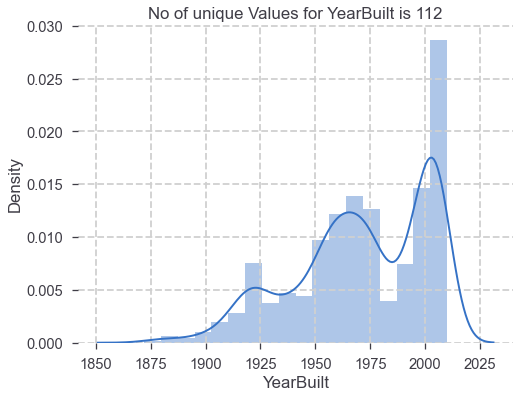

------------------------------------------------------
EnclosedPorch Distripution


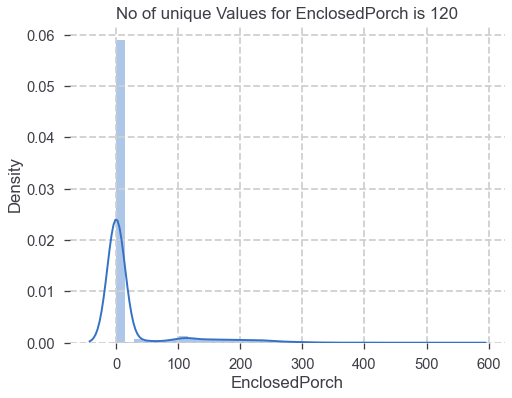

------------------------------------------------------
BsmtFinSF2 Distripution


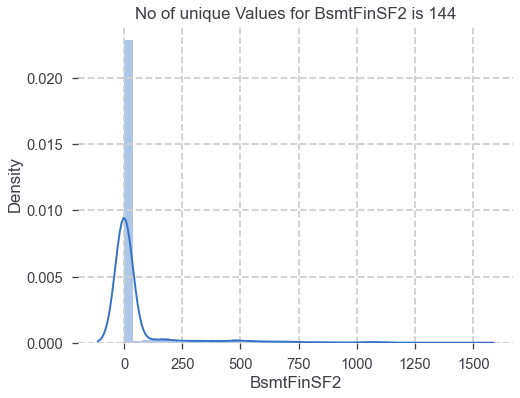

------------------------------------------------------
OpenPorchSF Distripution


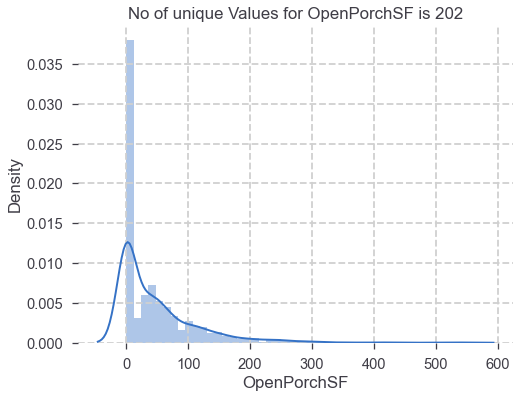

------------------------------------------------------
WoodDeckSF Distripution


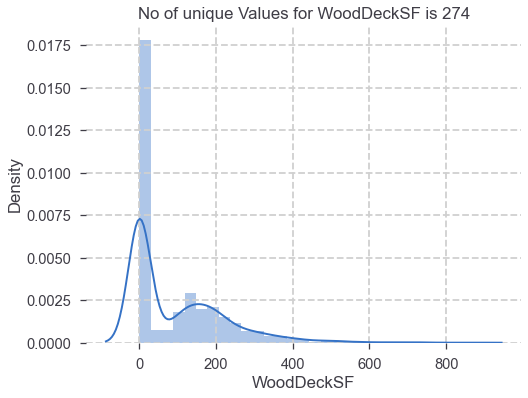

------------------------------------------------------
MasVnrArea Distripution


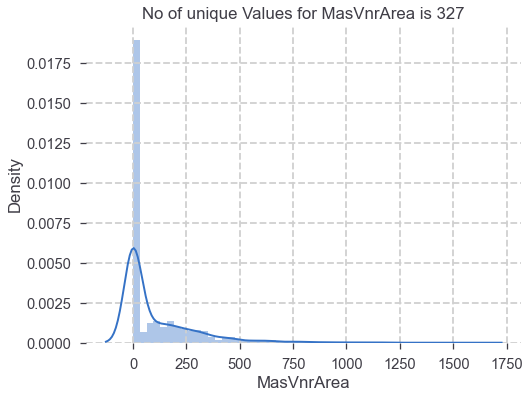

------------------------------------------------------
2ndFlrSF Distripution


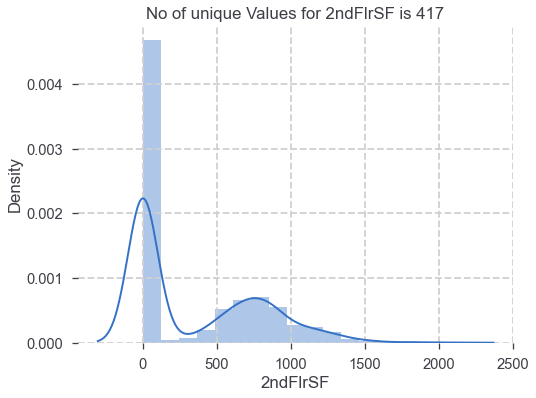

------------------------------------------------------
GarageArea Distripution


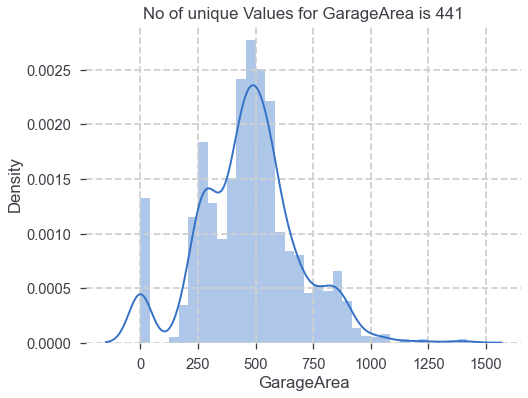

------------------------------------------------------
BsmtFinSF1 Distripution


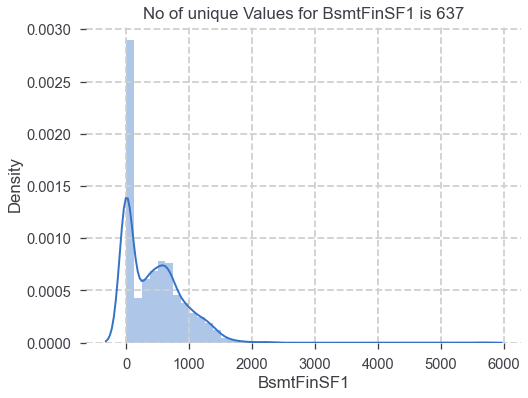

------------------------------------------------------
SalePrice Distripution


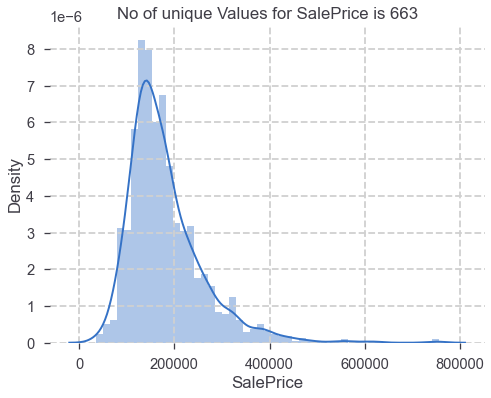

------------------------------------------------------
TotalBsmtSF Distripution


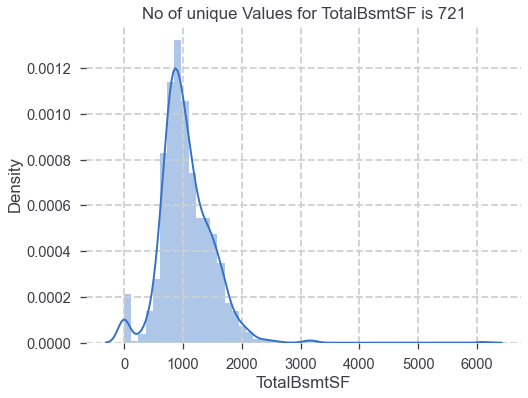

------------------------------------------------------
1stFlrSF Distripution


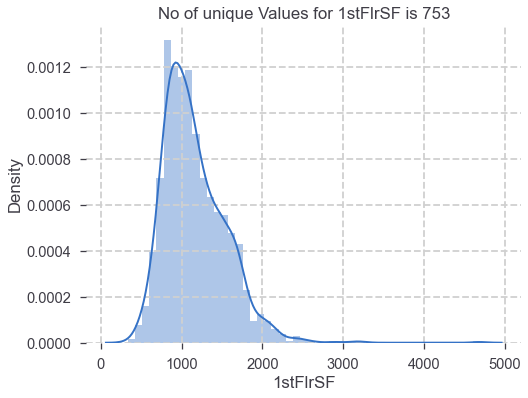

------------------------------------------------------
BsmtUnfSF Distripution


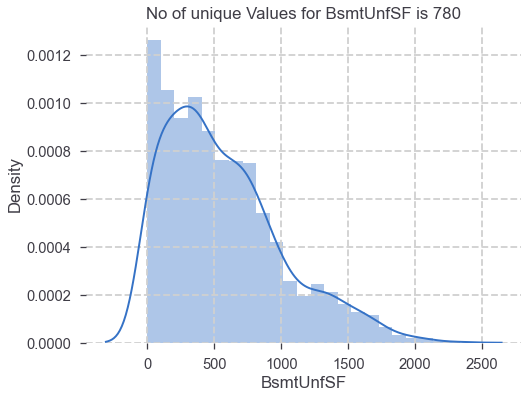

------------------------------------------------------
GrLivArea Distripution


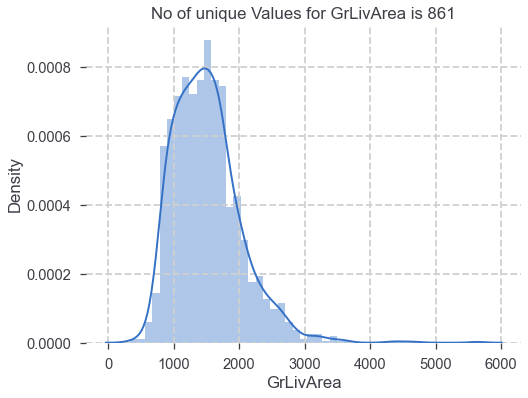

------------------------------------------------------
LotArea Distripution


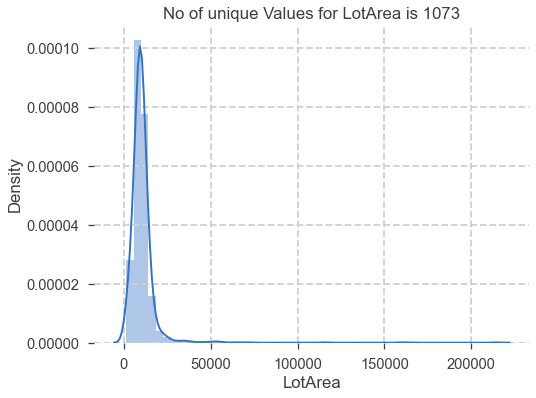

------------------------------------------------------


In [139]:
nuniqueVals = numarics.nunique(axis=0).sort_values().to_frame()
sortedDist = nuniqueVals.index
#see all numaric dist 
for i in sortedDist:
    print(f'{i} Distripution')
    sns.distplot(numarics[i])
    plt.title(f'No of unique Values for {i} is {nuniqueVals.loc[i].values[0]}')
    plt.show()
    print('------------------------------------------------------')

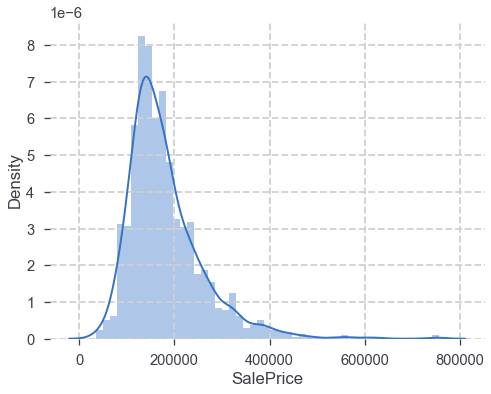

In [140]:
#show only sale price 
sns.distplot(train['SalePrice']);

##### Note
the sale price is some how skwed but that is predictable <br>
there will be some Houses with an over price and some will very low un salable prices 

37 col is alot to see whole distription for them all but i wanted to see how it's distriputed with each of there unique values if they were low 

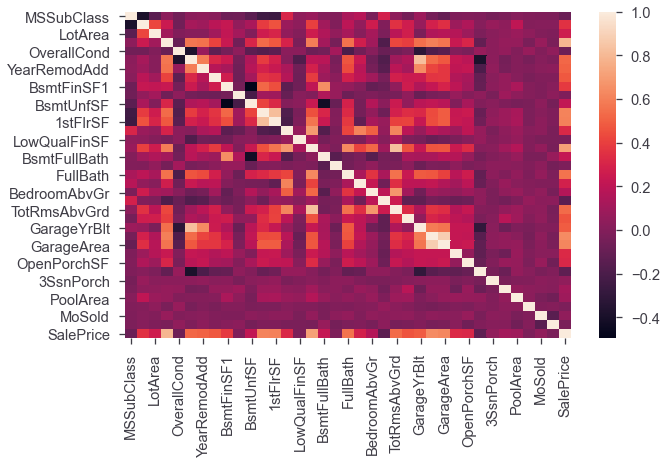

In [141]:
#lets see what about correlation
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(numarics.corr());

In [142]:
numarics.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


### Other cat 

In [143]:
obj = train.select_dtypes(include=['object'])
obj

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal


In [144]:
na = obj.isna().sum().sort_values(ascending =False)
objNA = na[na>0].to_frame()
objNA

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
GarageCond,81
GarageQual,81
GarageFinish,81
GarageType,81
BsmtFinType2,38


### Note
- ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond') are All Have the same missing Data and like the Year there 

In [145]:
## check 
train[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt']]\
[train.GarageYrBlt.isnull()].isna().sum()
## fill them all with 0

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
GarageYrBlt     81
dtype: int64

In [146]:
train[train.Electrical.isnull()]
#the only Value with 0 and it's just missing 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


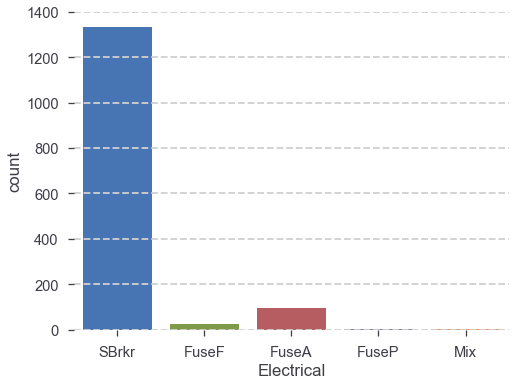

In [147]:
sns.countplot(train['Electrical']);
# i will fill it with mode

### See All count Plots 


Street Distripution


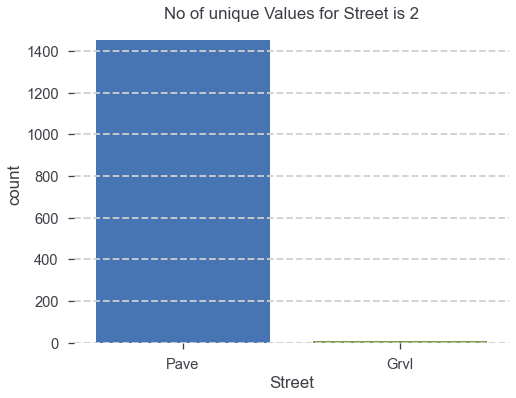

------------------------------------------------------
Alley Distripution


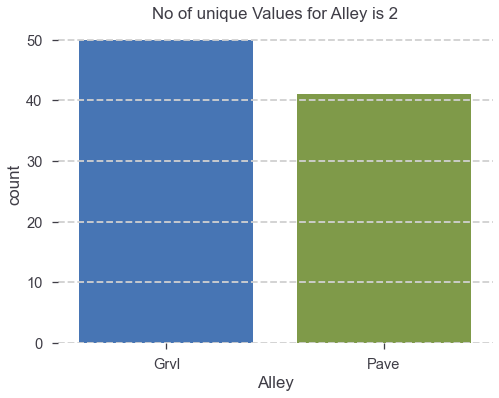

------------------------------------------------------
CentralAir Distripution


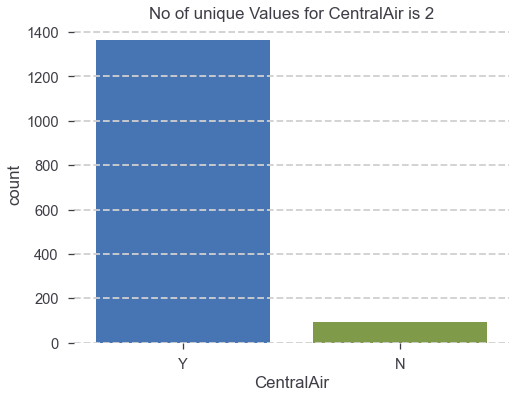

------------------------------------------------------
Utilities Distripution


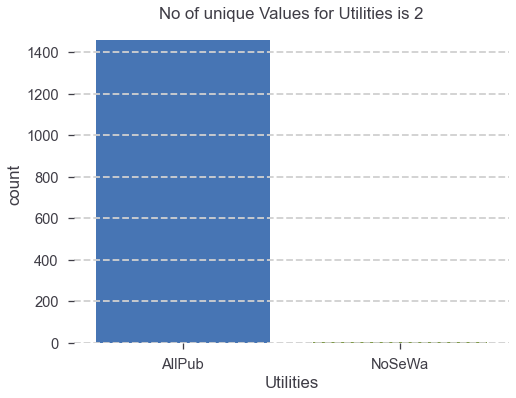

------------------------------------------------------
LandSlope Distripution


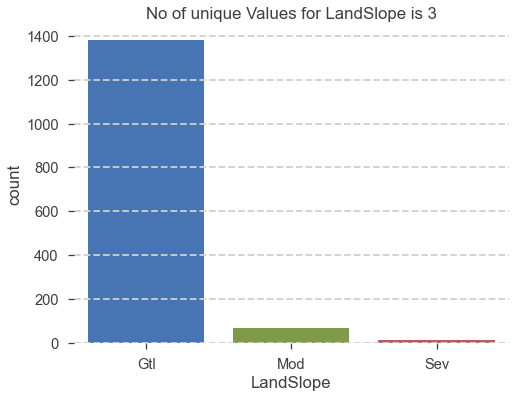

------------------------------------------------------
PoolQC Distripution


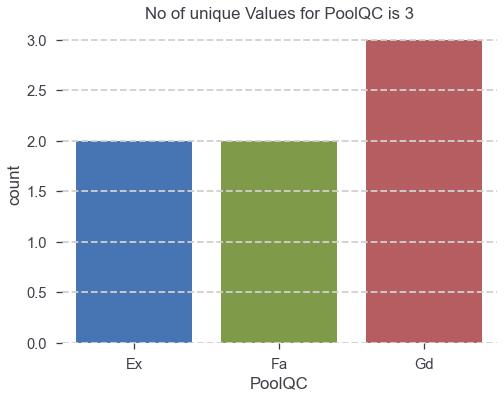

------------------------------------------------------
PavedDrive Distripution


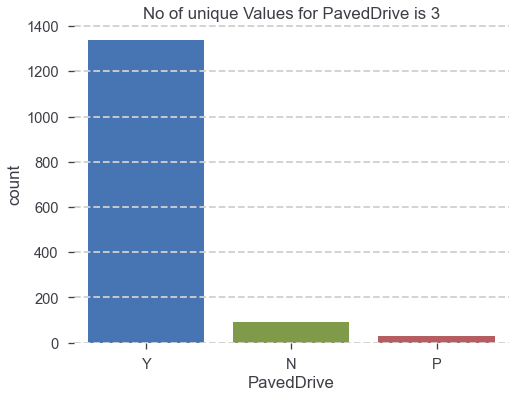

------------------------------------------------------
GarageFinish Distripution


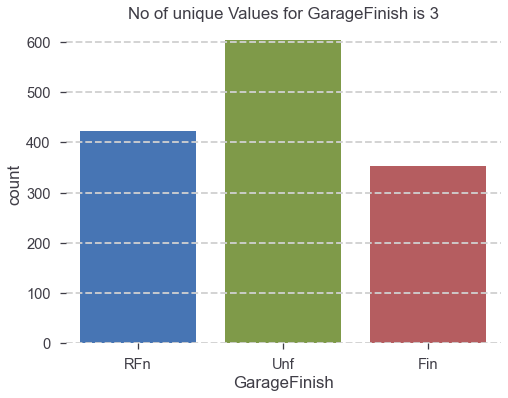

------------------------------------------------------
BsmtQual Distripution


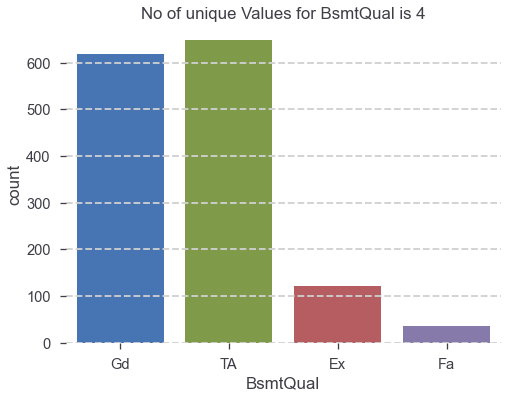

------------------------------------------------------
ExterQual Distripution


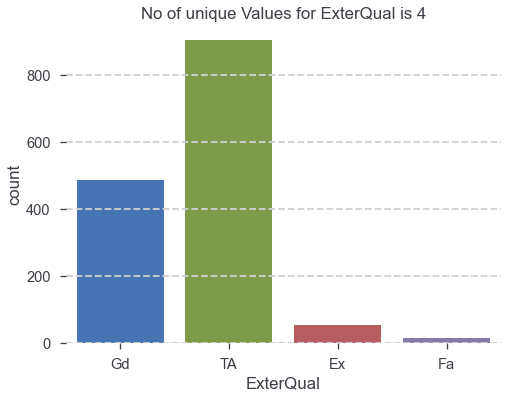

------------------------------------------------------
MasVnrType Distripution


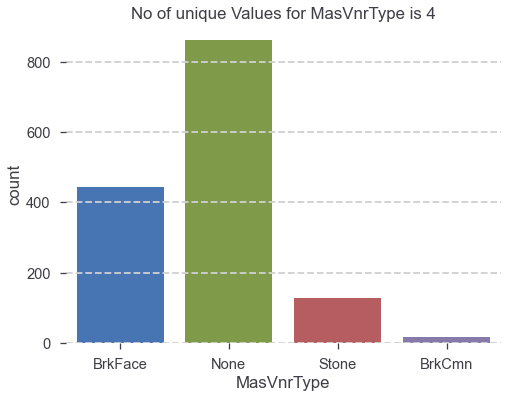

------------------------------------------------------
KitchenQual Distripution


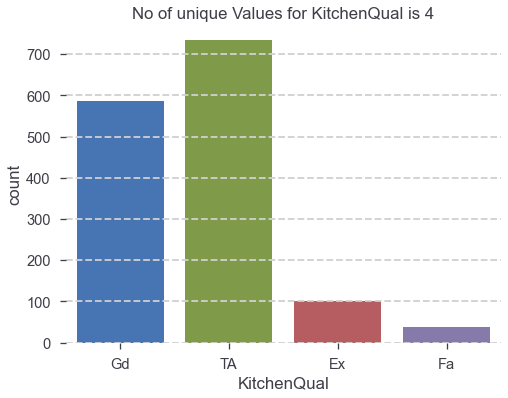

------------------------------------------------------
BsmtCond Distripution


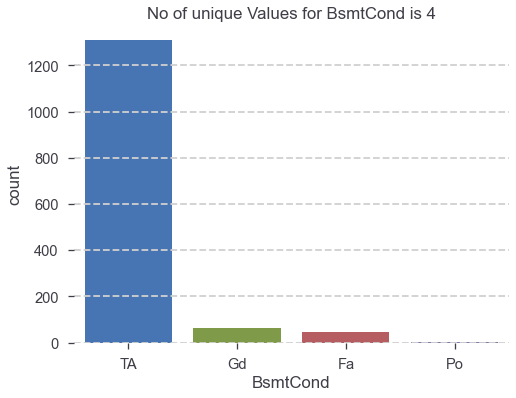

------------------------------------------------------
BsmtExposure Distripution


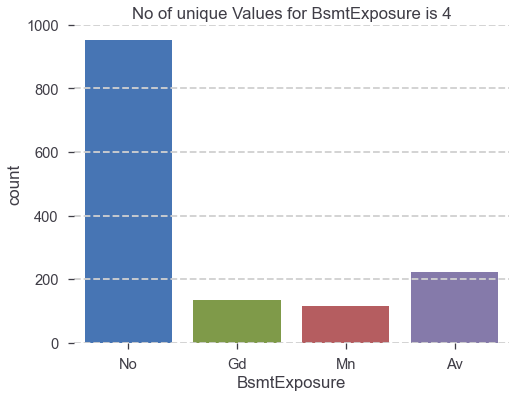

------------------------------------------------------
Fence Distripution


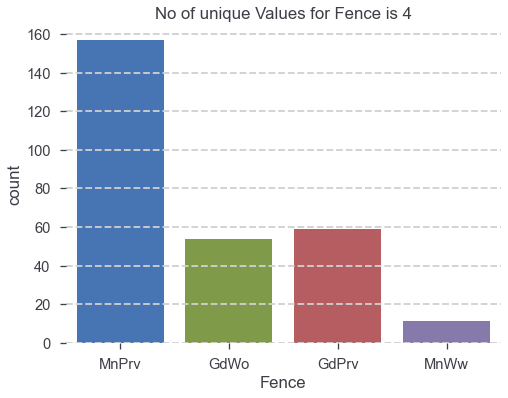

------------------------------------------------------
MiscFeature Distripution


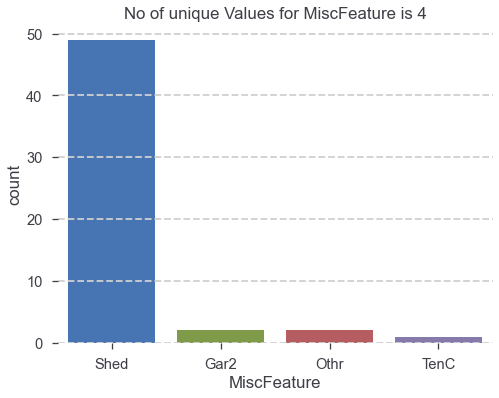

------------------------------------------------------
LandContour Distripution


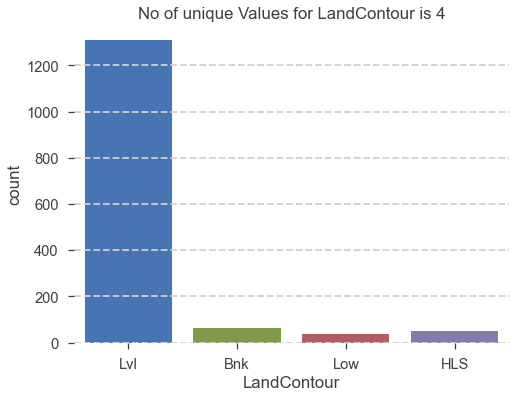

------------------------------------------------------
LotShape Distripution


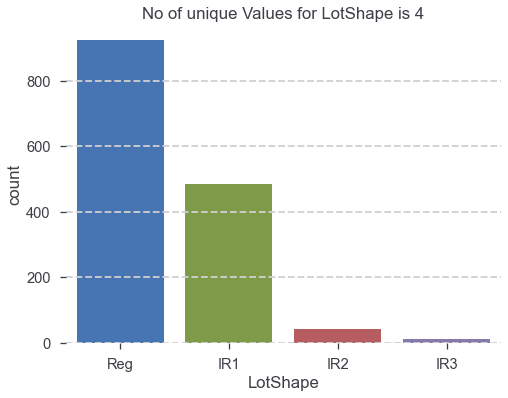

------------------------------------------------------
FireplaceQu Distripution


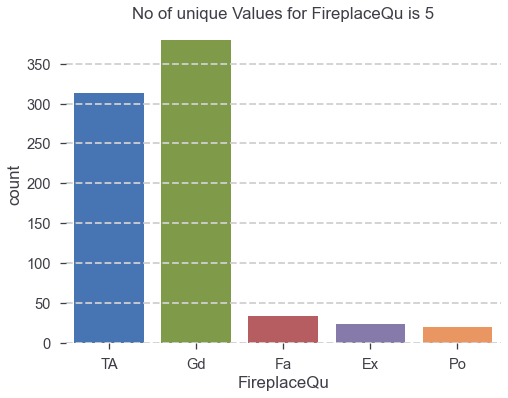

------------------------------------------------------
Electrical Distripution


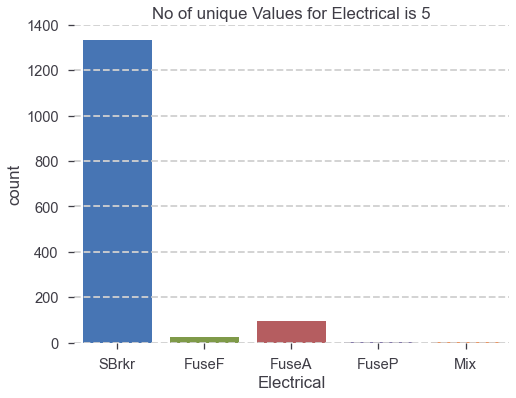

------------------------------------------------------
HeatingQC Distripution


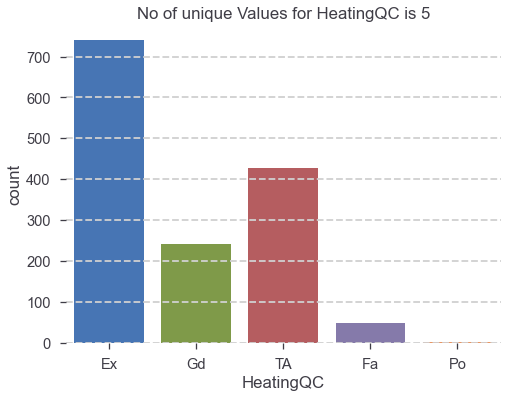

------------------------------------------------------
GarageQual Distripution


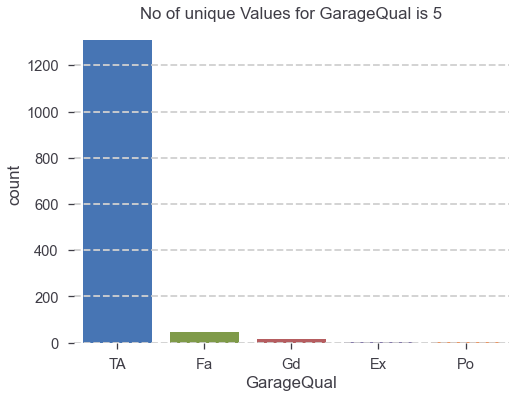

------------------------------------------------------
GarageCond Distripution


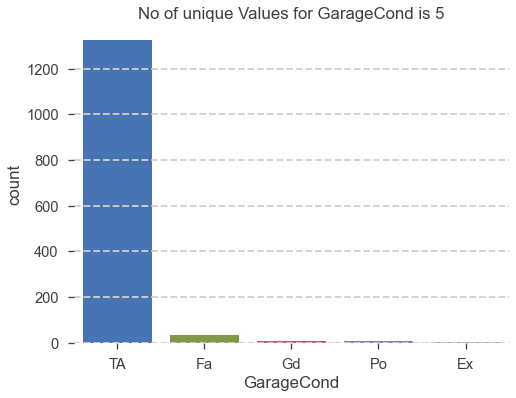

------------------------------------------------------
MSZoning Distripution


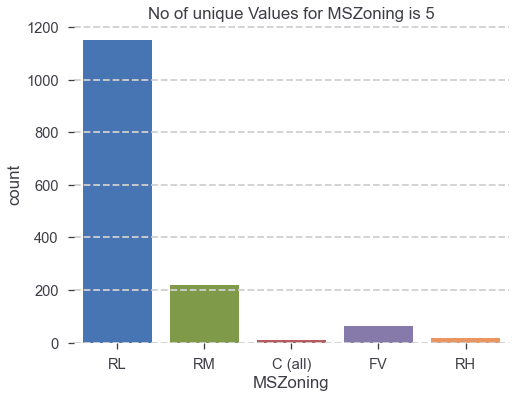

------------------------------------------------------
LotConfig Distripution


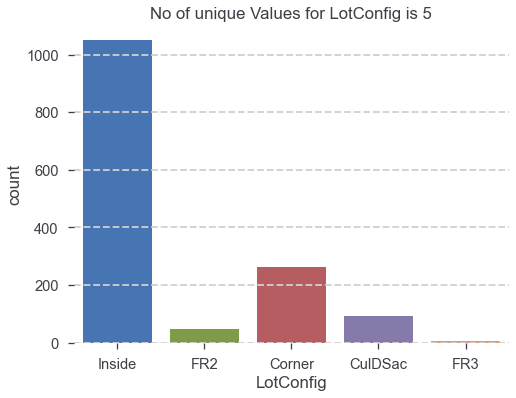

------------------------------------------------------
BldgType Distripution


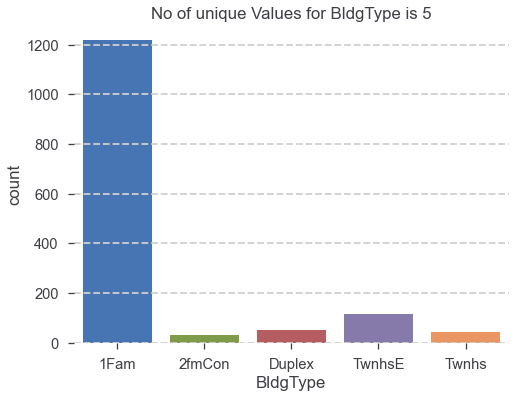

------------------------------------------------------
ExterCond Distripution


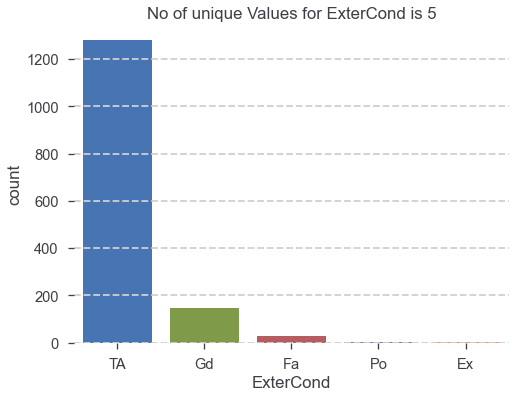

------------------------------------------------------
BsmtFinType1 Distripution


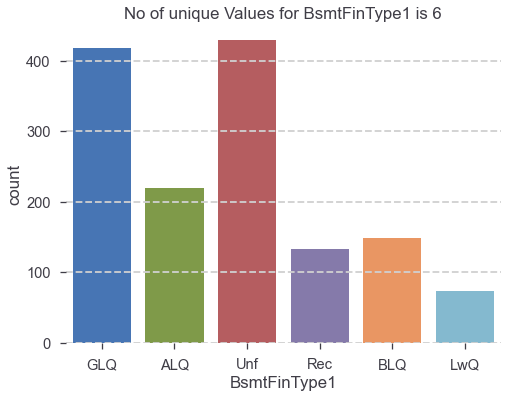

------------------------------------------------------
RoofStyle Distripution


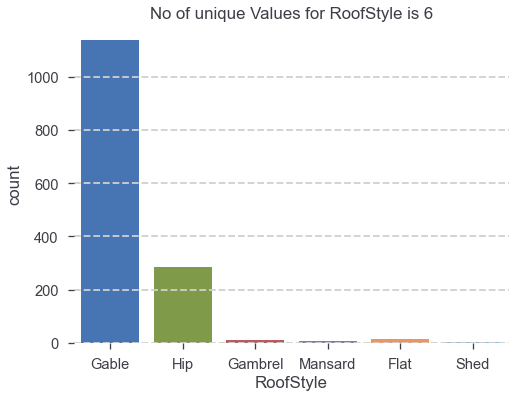

------------------------------------------------------
GarageType Distripution


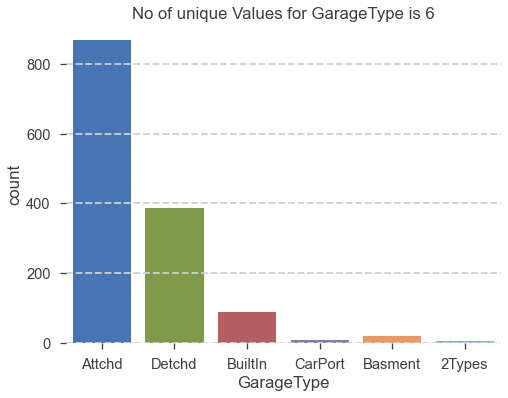

------------------------------------------------------
Foundation Distripution


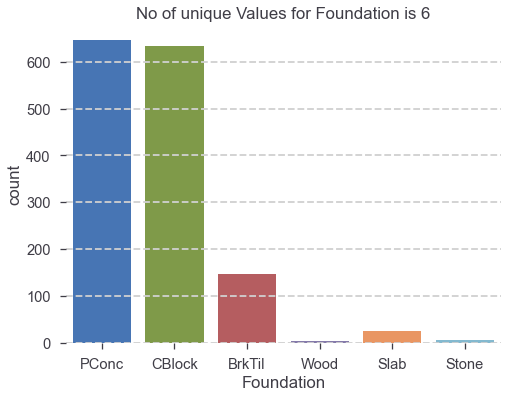

------------------------------------------------------
Heating Distripution


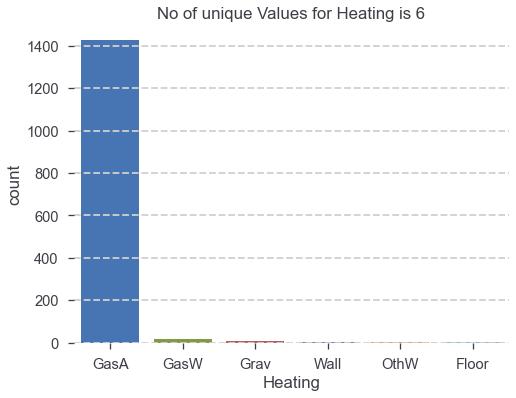

------------------------------------------------------
BsmtFinType2 Distripution


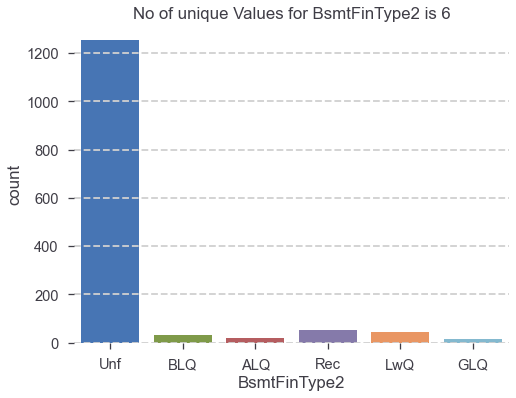

------------------------------------------------------
SaleCondition Distripution


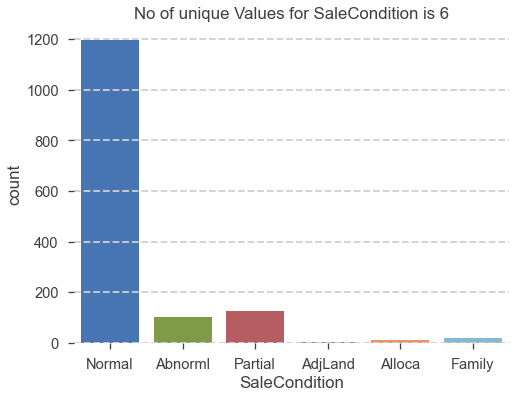

------------------------------------------------------
Functional Distripution


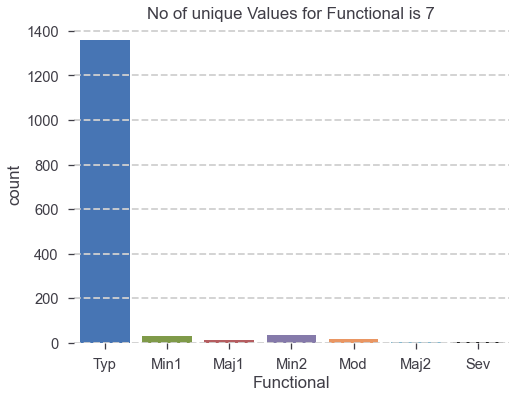

------------------------------------------------------
RoofMatl Distripution


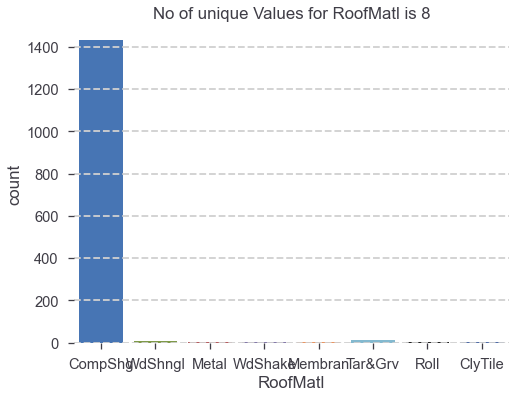

------------------------------------------------------
HouseStyle Distripution


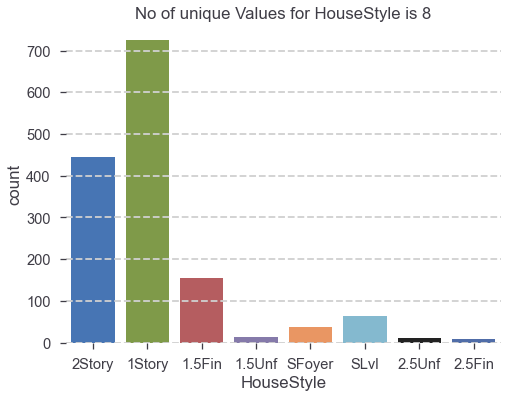

------------------------------------------------------
Condition2 Distripution


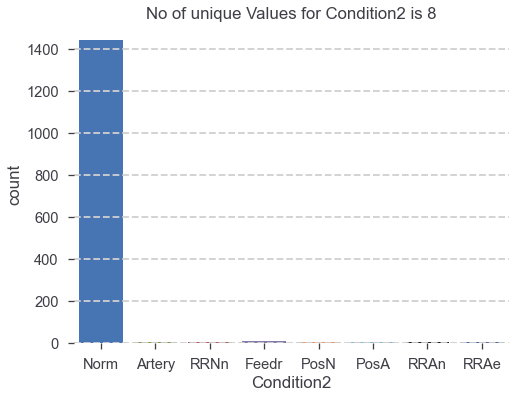

------------------------------------------------------
SaleType Distripution


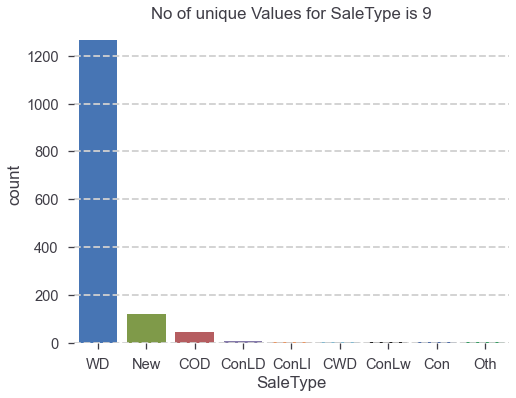

------------------------------------------------------
Condition1 Distripution


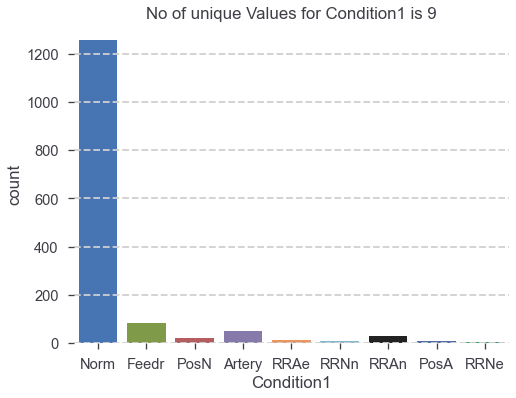

------------------------------------------------------
Exterior1st Distripution


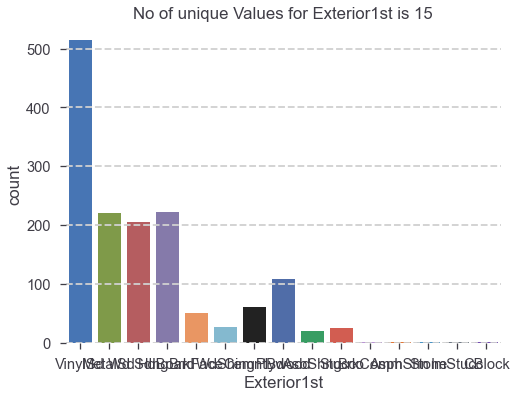

------------------------------------------------------
Exterior2nd Distripution


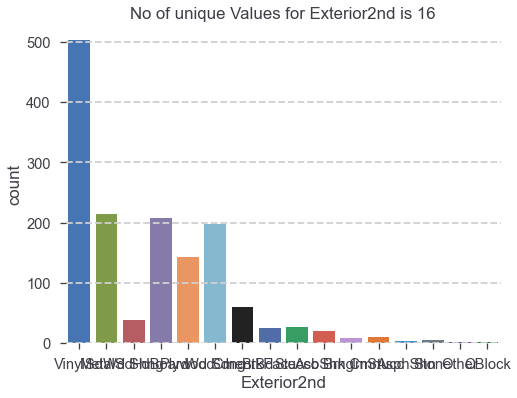

------------------------------------------------------
Neighborhood Distripution


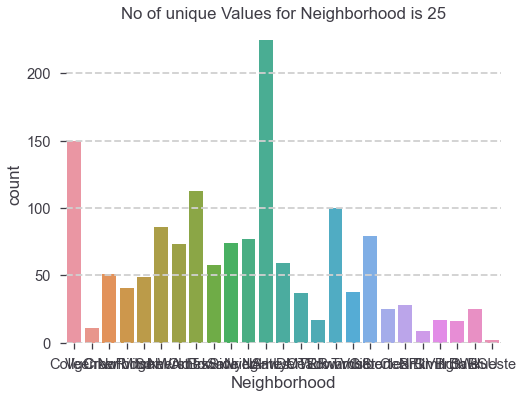

------------------------------------------------------


In [148]:
obj = train.select_dtypes(include=['object'])
nuniqueVals = obj.nunique(axis=0).sort_values().to_frame()
sortedDist = nuniqueVals.index
for i in sortedDist:
    print(f'{i} Distripution')
    sns.countplot(obj[i])
    plt.title(f'No of unique Values for {i} is {nuniqueVals.loc[i].values[0]}')
    plt.show()
    print('------------------------------------------------------')

### PoolQC 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
 fill the NA with None



#### MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
#### MiscVal: $Value of miscellaneous feature


#### Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [149]:
#Make sure all there 
assert obj.shape[1] + numarics.shape[1] == train.shape[1]

<a id="preprocess" ></a>
#### DataPreProcessing 
##### [Content](#Jump)

In [150]:
class Proccess:
    
    def __init__(self,df):
        self.TransformedDF = df.copy()


<a id='NA'></a>
### Clean NA values

In [151]:
numaricNA

,0
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8


In [152]:
def cleanMasVnrArea(self):
    self.TransformedDF["MasVnrArea"].fillna(0, inplace = True)

Proccess.cleanMasVnrArea = cleanMasVnrArea

def cleanGarage(self):    
    self.TransformedDF["GarageYrBlt"].fillna(0, inplace = True)

Proccess.cleanGarage = cleanGarage

### Note  
for the LotFrontage and as student i dont have yet convidnce enough to just do that to fill with na or mean  **i will try some them and see** 

In [153]:
#Found it online from reading 
def cleanLotFrontage_Median(self):
    self.TransformedDF["LotFrontage"] \
    = self.TransformedDF.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
Proccess.cleanLotFrontage_Median = cleanLotFrontage_Median

In [154]:
objNA

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
GarageCond,81
GarageQual,81
GarageFinish,81
GarageType,81
BsmtFinType2,38


In [155]:
def cleanElectrical(self):
    self.TransformedDF['Electrical'].fillna(self.TransformedDF['Electrical'].mode()[0] , inplace = True)
Proccess.cleanElectrical = cleanElectrical

#### Na To none based on the docs 
    alley   NA 	No alley access
    BsmtCond , BsmtQual, BsmtExposure,BsmtFinType1,BsmtFinType2   No Basement
    FireplaceQu No Fireplace
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' No Garage
    MasVnrType None = None
    

In [156]:
def FillWithNone(self):
    cols_with_None = ('PoolQC','MiscFeature','Alley' ,'Fence','FireplaceQu'
                      ,'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'
                      ,'BsmtFinType2' , 'BsmtExposure' , 'BsmtFinType1' , 'BsmtQual' ,'BsmtCond'
                      ,'MasVnrType')
    
    for col in cols_with_None:
        self.TransformedDF[col] = self.TransformedDF[col].fillna("NO")
        
    test_col = ('MSZoning' , 'Functional' , 'BsmtHalfBath' ,'BsmtFullBath'
                      ,'Exterior1st' , 'Exterior2nd' , 'KitchenQual' , 'BsmtUnfSF' , 'GarageCars' 
                      ,'GarageArea','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','SaleType')        
    for col in test_col:
        self.TransformedDF[col].fillna(self.TransformedDF[col].mode()[0] , inplace = True)
    
Proccess.FillWithNone = FillWithNone

### Covert Some Numaric into Cat 

In [157]:
def NumtoCat(self):
    for col in ["MSSubClass", "OverallCond", "YrSold", "MoSold"]:
        self.TransformedDF[col] = self.TransformedDF[col].apply(str)
Proccess.NumtoCat = NumtoCat

### Skewness of the Data

In [158]:
def boxcox1pFix(self):
    numarics_cols = self.TransformedDF.select_dtypes(include=['int16', 'int32', 'int64'
                                                         , 'float16', 'float32', 'float64']).columns
    for col in numarics_cols:
        self.TransformedDF[col] = boxcox1p(self.TransformedDF[col], 0.15)
Proccess.boxcox1pFix = boxcox1pFix

### Encoding ordinal And One hot

In [159]:
def Encoding(self):
    ordinal_cols  = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
    for col in ordinal_cols:
        myLabelEncoder = LabelEncoder()
        myLabelEncoder.fit(list(self.TransformedDF[col].values)) 
        self.TransformedDF[col] = myLabelEncoder.transform(list(self.TransformedDF[col].values))    
    
Proccess.Encoding = Encoding

In [160]:
def get_dummies(self):
     self.TransformedDF = pd.get_dummies(self.TransformedDF)
Proccess.get_dummies = get_dummies

### Data Scaling 

In [161]:
def Scaling(self):
    numarics = self.TransformedDF.select_dtypes(include=['int16', 'int32', 'int64'
                                                         , 'float16', 'float32', 'float64'])
    MyStandardScaler =  StandardScaler()
    self.TransformedDF[numarics.columns] \
    = MyStandardScaler.fit_transform(self.TransformedDF[numarics.columns])
Proccess.Scaling = Scaling

##### Clean Duplication

In [162]:
train[train.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [163]:
test[test.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


No Duplication here 


#### Final Data

In [164]:
methods = [method for method in dir(Proccess(train)) if inspect.ismethod(getattr(Proccess(train), method)) ]
methods.remove('__init__')
methods

['Encoding',
 'FillWithNone',
 'NumtoCat',
 'Scaling',
 'boxcox1pFix',
 'cleanElectrical',
 'cleanGarage',
 'cleanLotFrontage_Median',
 'cleanMasVnrArea',
 'get_dummies']

In [165]:
def ProcessAll(df):
    #Creat Obj 
    A = Proccess(df)
    #reorder the methods 
    methods = [ 'cleanElectrical', 'cleanGarage'
               , 'cleanLotFrontage_Median', 'cleanMasVnrArea','FillWithNone'] \
            + ['NumtoCat'] + ['Encoding' , 'boxcox1pFix' , 'get_dummies', 'Scaling' ]
    for method in methods:
        exec(f'A.{method}()')
        print(f'{method} is done')
        print(A.TransformedDF.shape)
    
    return A.TransformedDF

In [167]:
df = pd.concat((train, test)).reset_index(drop=True)
# df.drop(['SalePrice'], axis=1, inplace=True)
df.drop(df[(df['GrLivArea']>4000)].index, inplace=True)
df.drop(["Utilities"], axis=1, inplace=True)

NAS = df.isna().sum().sort_values(ascending = False)
print(NAS[NAS>0])

print("______________________ After __________________")
all_data = ProcessAll(df)
NAS = all_data.isna().sum().sort_values(ascending = False)
print(NAS[NAS>0])

PoolQC          2906
MiscFeature     2809
Alley           2716
Fence           2344
SalePrice       1458
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
Functional         2
BsmtHalfBath       2
GarageCars         1
BsmtFinSF2         1
Exterior2nd        1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
Exterior1st        1
Electrical         1
KitchenQual        1
BsmtFinSF1         1
SaleType           1
dtype: int64
______________________ After __________________
cleanElectrical is done
(2914, 79)
cleanGarage is done
(2914, 79)
cleanLotFrontage_Median is done
(2914, 79)
cleanMasVnrArea is done
(2914, 79)
FillWithNone is done
(2914, 79)
NumtoCat is done
(2914, 79)
Encoding is done
(291

In [172]:
TestDF = all_data[all_data['SalePrice'].isnull()]
TrainDF = all_data[all_data['SalePrice'].notnull()]

#### import Model 

In [182]:
X = TrainDF.drop(['SalePrice'] , axis = 1)
y = np.log(TrainDF["SalePrice"]+0.00001)  ##--- someone explain why this works better than +1

X_train, X_test, y_train, y_test\
= train_test_split(TrainDF, y, test_size=0.2, random_state=911)

In [183]:
params = {'alpha': [20] }


ridge = Ridge()

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1 ,n_jobs=-1 )    

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [84]:
ridge = model_cv.best_estimator_
ridge

Ridge(alpha=20)

In [85]:
y_train_pred_ridge = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred_ridge))

0.10498476417812541


In [86]:
y_test_pred_ridge = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

-0.07639624077740348


In [ ]:
X_test.shape

In [ ]:
TestDF.shape

----

### Preparing submission:

In [ ]:
TestDF.columns

In [ ]:
TrainDF.columns

In [ ]:
preds = np.exp(ridge.predict(TestDF))

In [ ]:
predictions = pd.DataFrame({'Id': df_test['Id'] ,'SalePrice': preds })

In [ ]:
predictions.to_csv("preds.csv",index=False)

In [ ]:
predictions.SalePrice

In [ ]:
preds = np.exp(ridge.predict(test))

predictions = pd.DataFrame({'Id': df_test['Id'] ,'SalePrice': preds })

predictions.to_csv("preds.csv",index=False)

predictions.SalePrice